<a href="https://colab.research.google.com/github/Samin-Sadaf7/Image_works/blob/main/EfficientDet_traffic_sign_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:

import zipfile
import os

def extract_zip(zip_path, extract_to):
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [ ]:
#zip_path = '/content/gdrive/MyDrive/Dataset- -Conference/Dataset- -Conference/train/train-20240716T142031Z-001.zip'
#extract_to ='/content/gdrive/MyDrive/Dataset- -Conference/Dataset- -Conference/train_main'
#extract_zip(zip_path, extract_to)

In [3]:
!pip install --quiet albumentations
!pip install --quiet effdet
!pip install --quiet ensemble-boxes
!pip install --quiet fastcore
!pip install --quiet pytorch-lightning
!pip install --quiet timm
!pip install --quiet torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 15.8 MB/s eta 0:00:00


In [4]:
!pip install pytorch_lightning==1.6.0

Requested pytorch_lightning==1.6.0 from https://files.pythonhosted.org/packages/09/18/cee67f4849dea9a29b7af7cdf582246bcba9eaa73d9443e138a4172ec786/pytorch_lightning-1.6.0-py3-none-any.whl has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    torch (>=1.8.*)
           ~~~~~~^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement pytorch_lightning==1.6.0 (from versions: 0.0.2, 0.2, 0.2.2, 0.2.3, 0.2.4, 0.2.4.1, 0.2.5, 0.2.5.1, 0.2.5.2, 0.2.6, 0.3, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.3.4.1, 0.3.5, 0.3.6, 0.3.6.1, 0.3.6.3, 0.3.6.4, 0.3.6.5, 0.3.6.6, 0.3.6.7, 0.3.6.8, 0.3.6.9, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.5.0, 0.5.1, 0.5.1.2, 0.5.1.3, 0.5.2, 0.5.2.1, 0.5.3, 0.5.3.1, 0.5.3.2, 0.5.3.3, 0.6.0, 0.7.1, 0.7.3, 0.7.5, 0.7.6, 0.8.1, 0.8.3, 0.8.4, 0.8.5, 0.9.0, 0.10.0, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.

In [5]:
from pathlib import Path
#For saminsadaf7 account
train_dataset_path = Path('/content/gdrive/MyDrive/Dataset- -Conference/train/images')
val_dataset_path = Path('/content/gdrive/MyDrive/Dataset- -Conference/val/images')
#For saminsadaf iut_account
#train_dataset_path = Path('/content/gdrive/MyDrive/Dataset- -Conference/Dataset- -Conference/train/images')

In [6]:
import pandas as pd
#For saminsadaf7 account
df_train = pd.read_csv('/content/gdrive/MyDrive/Dataset- -Conference/train/train_labels.csv')
df_val = pd.read_csv('/content/gdrive/MyDrive/Dataset- -Conference/val/val_labels.csv')
#For saminsadaf iut_account
#df = pd.read_csv('/content/gdrive/MyDrive/Dataset- -Conference/Dataset- -Conference/train/train_labels.csv')

In [8]:
len(df_train), len(df_val)

(971, 248)

In [9]:
df_train.head(), df_val.head()

(         filename  xmin  ymin  xmax  ymax       class
 0   V0110_790.png  1091   430  1170   514  Crossroads
 1  V0170_1140.png   523   700   544   721  Crossroads
 2     V0076_0.png   862   195   908   237  Crossroads
 3  V0170_1250.png     1   514    41   592  Crossroads
 4  V0168_2700.png   312   657   353   698   Road Hump,
           filename  xmin  ymin  xmax  ymax                    class
 0   V0167_6370.png   310   729   341   763  Sharp Bend To The Right
 1   V0168_3150.png   954   599   995   637  Sharp Bend To The Right
 2   V0145_3440.png   360   613   400   646  Sharp Bend To The Right
 3  V0181_41880.png   492   685   542   736  Sharp Bend To The Right
 4   V0181_3640.png  1111   738  1135   759  Sharp Bend To The Right)

In [10]:
df_train.rename(columns={'filename':'image'}, inplace=True)
df_val.rename(columns={'filename':'image'}, inplace=True)

In [29]:
import os
image_files_train = os.listdir(train_dataset_path)
image_files_val = os.listdir(val_dataset_path)
modified_df_train = df_train[df_train['image'].isin(image_files_train)]
modified_df_val = df_val[df_val['image'].isin(image_files_val)]

In [20]:
len(modified_df_train), len(modified_df_val)

(738, 243)

In [21]:
modified_df_train.head(), modified_df_val.head()

(             image  xmin  ymin  xmax  ymax           class
 3   V0170_1250.png     1   514    41   592      Crossroads
 20  V0152_1100.png   490   268   532   312  no use of horn
 21  V0152_1100.png   461   317   487   345       Road Hump
 64   V0031_198.png   771   183   800   209   Narrow Bridge
 65   V0031_210.png   755   300   786   330   Narrow Bridge,
              image  xmin  ymin  xmax  ymax                    class
 0   V0167_6370.png   310   729   341   763  Sharp Bend To The Right
 1   V0168_3150.png   954   599   995   637  Sharp Bend To The Right
 2   V0145_3440.png   360   613   400   646  Sharp Bend To The Right
 3  V0181_41880.png   492   685   542   736  Sharp Bend To The Right
 4   V0181_3640.png  1111   738  1135   759  Sharp Bend To The Right)

In [30]:
modified_df_train['class'].unique(), modified_df_val['class'].unique()

(array(['Crossroads', 'no use of horn', 'Road Hump', 'Narrow Bridge',
        'speed limit 40 km/h', 'Side Road Right', 'School',
        'Sharp Bend To The Left', 'speed limit 80 km/h', 'Side Road Left',
        'PEDESTRIAN CROSSING', 'No Overtaking', 'Sharp Bend To The Right',
        'Speed Limit 60 km/h'], dtype=object),
 array(['Sharp Bend To The Right', 'Road Hump', 'Sharp Bend To The Left',
        'speed limit 40 km/h', 'School', 'Speed Limit 60 km/h',
        'speed limit 80 km/h', 'No Overtaking', 'Narrow Bridge',
        'Crossroads', 'no use of horn', 'PEDESTRIAN CROSSING',
        'Side Road Left', 'Side Road Right', 'U Turn'], dtype=object))

In [31]:
class_to_serial = {
    'Crossroads': 1,
    'no use of horn': 2,
    'Road Hump': 3,
    'Narrow Bridge': 4,
    'speed limit 40 km/h': 5,
    'Side Road Right': 6,
    'School': 7,
    'Sharp Bend To The Left': 8,
    'speed limit 80 km/h': 9,
    'Side Road Left': 10,
    'PEDESTRIAN CROSSING': 11,
    'No Overtaking': 12,
    'Sharp Bend To The Right': 13,
    'Speed Limit 60 km/h': 14,
    'U Turn': 15
}

modified_df_train['class'] = modified_df_train['class'].map(class_to_serial)
modified_df_val['class'] = modified_df_val['class'].map(class_to_serial)

print(modified_df_train)
print(modified_df_val)

              image  xmin  ymin  xmax  ymax  class
3    V0170_1250.png     1   514    41   592      1
20   V0152_1100.png   490   268   532   312      2
21   V0152_1100.png   461   317   487   345      3
64    V0031_198.png   771   183   800   209      4
65    V0031_210.png   755   300   786   330      4
..              ...   ...   ...   ...   ...    ...
944   V0081_230.png   161     1   416   206      1
951   V0110_690.png  1114   373  1156   410      1
959  V0125_8540.png   651   548   720   618      7
963    V0081_40.png  1105   313  1127   333      1
964  V0170_1120.png   567   708   588   730      1

[738 rows x 6 columns]
               image  xmin  ymin  xmax  ymax  class
0     V0167_6370.png   310   729   341   763     13
1     V0168_3150.png   954   599   995   637     13
2     V0145_3440.png   360   613   400   646     13
3    V0181_41880.png   492   685   542   736     13
4     V0181_3640.png  1111   738  1135   759     13
..               ...   ...   ...   ...   ...    ...


<ipython-input-31-4518131f4377>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df_train['class'] = modified_df_train['class'].map(class_to_serial)
<ipython-input-31-4518131f4377>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df_val['class'] = modified_df_val['class'].map(class_to_serial)


In [33]:
serial_to_class = {v: k for k, v in class_to_serial.items()}
def get_class_name(serial_number):
    return serial_to_class.get(serial_number, "Serial number not found")

##Dataset Adapters

In [34]:
import matplotlib.pyplot as plt
from matplotlib import patches

def get_rectangle_edges_from_pascal_bbox(bbox):
    xmin_top_left, ymin_top_left, xmax_bottom_right, ymax_bottom_right = bbox

    bottom_left = (xmin_top_left, ymax_bottom_right)
    width = xmax_bottom_right - xmin_top_left
    height = ymin_top_left - ymax_bottom_right

    return bottom_left, width, height

def draw_pascal_voc_bboxes(
    plot_ax,
    bboxes,
    get_rectangle_corners_fn=get_rectangle_edges_from_pascal_bbox,
):
    for bbox in bboxes:
        bottom_left, width, height = get_rectangle_corners_fn(bbox)

        rect_1 = patches.Rectangle(
            bottom_left,
            width,
            height,
            linewidth=4,
            edgecolor="black",
            fill=False,
        )
        rect_2 = patches.Rectangle(
            bottom_left,
            width,
            height,
            linewidth=2,
            edgecolor="white",
            fill=False,
        )

        # Add the patch to the Axes
        plot_ax.add_patch(rect_1)
        plot_ax.add_patch(rect_2)

def show_image(
    image, bboxes=None, draw_bboxes_fn=draw_pascal_voc_bboxes, figsize=(10, 10)
):
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.imshow(image)

    if bboxes is not None:
        draw_bboxes_fn(ax, bboxes)

    plt.show()

In [35]:
from pathlib import Path

import PIL

import numpy as np

class TrafficSignsDatasetAdaptor:
    def __init__(self, images_dir_path, annotations_dataframe):
        self.images_dir_path = Path(images_dir_path)
        self.annotations_df = annotations_dataframe
        self.images = self.annotations_df.image.unique().tolist()

    def __len__(self) -> int:
        return len(self.images)

    def get_image_and_labels_by_idx(self, index):
        image_name = self.images[index]
        image = PIL.Image.open(self.images_dir_path / image_name)
        pascal_bboxes = self.annotations_df[self.annotations_df.image == image_name][
            ["xmin", "ymin", "xmax", "ymax"]
        ].values
        class_labels = self.annotations_df[self.annotations_df.image == image_name][
            "class"
        ].values
        #class_labels = np.ones(len(pascal_bboxes))

        return image, pascal_bboxes, class_labels, index

    def show_image(self, index):
        image, bboxes, class_labels, image_id = self.get_image_and_labels_by_idx(index)
        print(f"image_id: {image_id}")
        show_image(image, bboxes.tolist())
        print(get_class_name(class_labels[0]))

In [36]:
traffic_sign_train_ds = TrafficSignsDatasetAdaptor(train_dataset_path, modified_df_train)
traffic_sign_val_ds = TrafficSignsDatasetAdaptor(val_dataset_path, modified_df_val)

image_id: 0


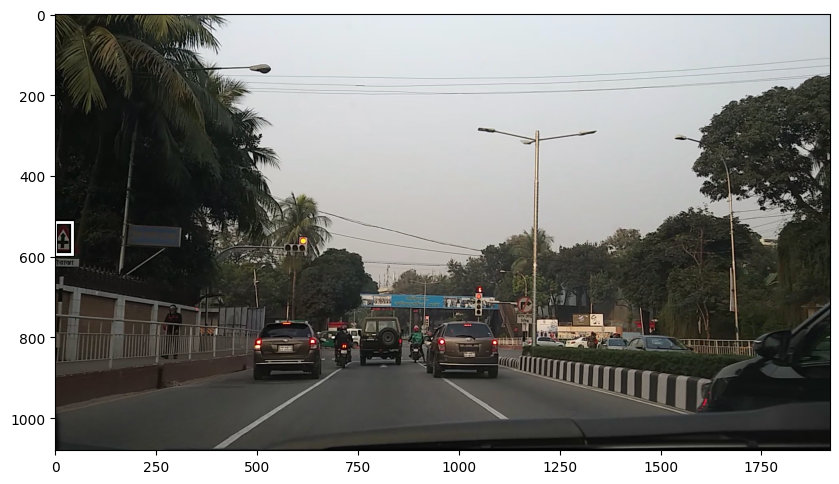

Crossroads


In [38]:
traffic_sign_train_ds.show_image(0)

image_id: 0


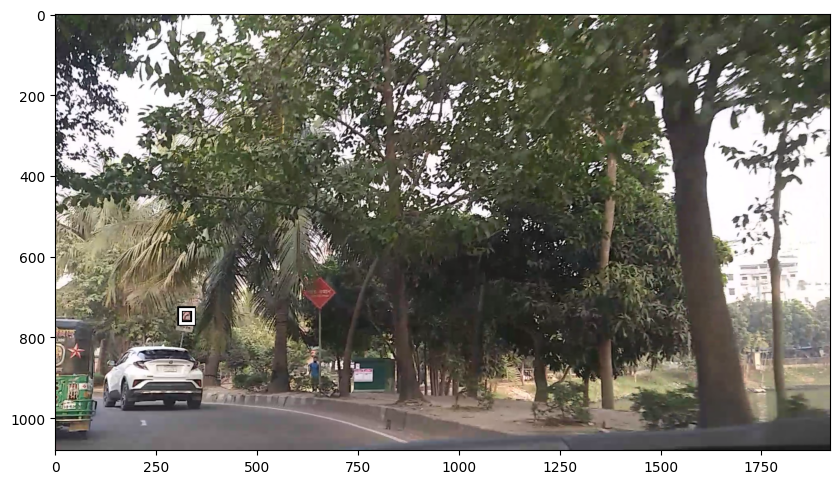

Sharp Bend To The Right


In [39]:
traffic_sign_val_ds.show_image(0)

##Creating the Model

In [40]:
from effdet.config.model_config import efficientdet_model_param_dict
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
from effdet.config.model_config import efficientdet_model_param_dict

In [41]:
print(f'number of configs: {len(efficientdet_model_param_dict)}')

list(efficientdet_model_param_dict.keys())[::3]

number of configs: 47


['efficientdet_d0',
 'efficientdet_d3',
 'efficientdetv2_dt',
 'cspresdet50',
 'cspdarkdet53',
 'mixdet_l',
 'mobiledetv3_large',
 'efficientdet_q2',
 'efficientdet_em',
 'tf_efficientdet_d1',
 'tf_efficientdet_d4',
 'tf_efficientdet_d7',
 'tf_efficientdet_d1_ap',
 'tf_efficientdet_d4_ap',
 'tf_efficientdet_lite1',
 'tf_efficientdet_lite3x']

In [42]:
import timm
timm.list_models('tf_efficientnetv2_*')

['tf_efficientnetv2_b0',
 'tf_efficientnetv2_b1',
 'tf_efficientnetv2_b2',
 'tf_efficientnetv2_b3',
 'tf_efficientnetv2_l',
 'tf_efficientnetv2_m',
 'tf_efficientnetv2_s',
 'tf_efficientnetv2_xl']

In [43]:
def create_model(num_classes=1, image_size=512, architecture="tf_efficientnetv2_l"):
    efficientdet_model_param_dict['tf_efficientnetv2_l'] = dict(
        name='tf_efficientnetv2_l',
        backbone_name='tf_efficientnetv2_l',
        backbone_args=dict(drop_path_rate=0.2),
        num_classes=num_classes,
        url='', )

    config = get_efficientdet_config(architecture)
    config.update({'num_classes': num_classes})
    config.update({'image_size': (image_size, image_size)})

    print(config)

    net = EfficientDet(config, pretrained_backbone=True)
    net.class_net = HeadNet(
        config,
        num_outputs=config.num_classes,
    )
    return DetBenchTrain(net, config)

##Define EfficientDet Dataset

In [44]:
from torch.utils.data import Dataset

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2


def get_train_transforms(target_img_size=1024):
    return A.Compose(
        [
            A.HorizontalFlip(p=0.5),
            A.Resize(height=target_img_size, width=target_img_size, p=1),
            A.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ToTensorV2(p=1),
        ],
        p=1.0,
        bbox_params=A.BboxParams(
            format="pascal_voc", min_area=0, min_visibility=0, label_fields=["labels"]
        ),
    )


def get_valid_transforms(target_img_size=1024):
    return A.Compose(
        [
            A.Resize(height=target_img_size, width=target_img_size, p=1),
            A.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ToTensorV2(p=1),
        ],
        p=1.0,
        bbox_params=A.BboxParams(
            format="pascal_voc", min_area=0, min_visibility=0, label_fields=["labels"]
        ),
    )

class EfficientDetDataset(Dataset):
    def __init__(
        self, dataset_adaptor, transforms=get_valid_transforms()
    ):
        self.ds = dataset_adaptor
        self.transforms = transforms

    def __getitem__(self, index):
        (
            image,
            pascal_bboxes,
            class_labels,
            image_id,
        ) = self.ds.get_image_and_labels_by_idx(index)

        sample = {
            "image": np.array(image, dtype=np.float32),
            "bboxes": pascal_bboxes,
            "labels": class_labels,
        }

        sample = self.transforms(**sample)
        sample["bboxes"] = np.array(sample["bboxes"])
        image = sample["image"]
        pascal_bboxes = sample["bboxes"]
        labels = sample["labels"]

        _, new_h, new_w = image.shape
        sample["bboxes"][:, [0, 1, 2, 3]] = sample["bboxes"][
            :, [1, 0, 3, 2]
        ]  # convert to yxyx

        target = {
            "bboxes": torch.as_tensor(sample["bboxes"], dtype=torch.float32),
            "labels": torch.as_tensor(labels),
            "image_id": torch.tensor([image_id]),
            "img_size": (new_h, new_w),
            "img_scale": torch.tensor([1.0]),
        }

        return image, target, image_id

    def __len__(self):
        return len(self.ds)

##Define the DataModule

In [45]:
from pytorch_lightning import LightningDataModule
from torch.utils.data import DataLoader

class EfficientDetDataModule(LightningDataModule):

    def __init__(self,
                train_dataset_adaptor,
                validation_dataset_adaptor,
                train_transforms=get_train_transforms(target_img_size=512),
                valid_transforms=get_valid_transforms(target_img_size=512),
                num_workers=4,
                batch_size=8):

        self.train_ds = train_dataset_adaptor
        self.valid_ds = validation_dataset_adaptor
        self.train_tfms = train_transforms
        self.valid_tfms = valid_transforms
        self.num_workers = num_workers
        self.batch_size = batch_size
        super().__init__()

    def train_dataset(self) -> EfficientDetDataset:
        return EfficientDetDataset(
            dataset_adaptor=self.train_ds, transforms=self.train_tfms
        )

    def train_dataloader(self) -> DataLoader:
        train_dataset = self.train_dataset()
        train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            pin_memory=True,
            drop_last=True,
            num_workers=self.num_workers,
            collate_fn=self.collate_fn,
        )

        return train_loader

    def val_dataset(self) -> EfficientDetDataset:
        return EfficientDetDataset(
            dataset_adaptor=self.valid_ds, transforms=self.valid_tfms
        )

    def val_dataloader(self) -> DataLoader:
        valid_dataset = self.val_dataset()
        valid_loader = torch.utils.data.DataLoader(
            valid_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            pin_memory=True,
            drop_last=True,
            num_workers=self.num_workers,
            collate_fn=self.collate_fn,
        )

        return valid_loader

    @staticmethod
    def collate_fn(batch):
        images, targets, image_ids = tuple(zip(*batch))
        images = torch.stack(images)
        images = images.float()

        boxes = [target["bboxes"].float() for target in targets]
        labels = [target["labels"].float() for target in targets]
        img_size = torch.tensor([target["img_size"] for target in targets]).float()
        img_scale = torch.tensor([target["img_scale"] for target in targets]).float()

        annotations = {
            "bbox": boxes,
            "cls": labels,
            "img_size": img_size,
            "img_scale": img_scale,
        }

        return images, annotations, targets, image_ids

##Define the Training Loop

In [46]:
from numbers import Number
from typing import List
from functools import singledispatch

import numpy as np
import torch

from fastcore.dispatch import typedispatch
from pytorch_lightning import LightningModule


from ensemble_boxes import ensemble_boxes_wbf


def run_wbf(predictions, image_size=512, iou_thr=0.44, skip_box_thr=0.43, weights=None):
    bboxes = []
    confidences = []
    class_labels = []

    for prediction in predictions:
        boxes = [(prediction["boxes"] / image_size).tolist()]
        scores = [prediction["scores"].tolist()]
        labels = [prediction["classes"].tolist()]

        boxes, scores, labels = ensemble_boxes_wbf.weighted_boxes_fusion(
            boxes,
            scores,
            labels,
            weights=weights,
            iou_thr=iou_thr,
            skip_box_thr=skip_box_thr,
        )
        boxes = boxes * (image_size - 1)
        bboxes.append(boxes.tolist())
        confidences.append(scores.tolist())
        class_labels.append(labels.tolist())

    return bboxes, confidences, class_labels


class EfficientDetModel(LightningModule):
    def __init__(
        self,
        num_classes=1,
        img_size=512,
        prediction_confidence_threshold=0.2,
        learning_rate=0.0002,
        wbf_iou_threshold=0.44,
        inference_transforms=get_valid_transforms(target_img_size=512),
        model_architecture='tf_efficientnetv2_l',
    ):
        super().__init__()
        self.img_size = img_size
        self.model = create_model(
            num_classes, img_size, architecture=model_architecture
        )
        self.prediction_confidence_threshold = prediction_confidence_threshold
        self.lr = learning_rate
        self.wbf_iou_threshold = wbf_iou_threshold
        self.inference_tfms = inference_transforms



    def forward(self, images, targets):
        return self.model(images, targets)

    def configure_optimizers(self):
        return torch.optim.AdamW(self.model.parameters(), lr=self.lr)


    def training_step(self, batch, batch_idx):
        images, annotations, _, image_ids = batch

        losses = self.model(images, annotations)

        logging_losses = {
            "class_loss": losses["class_loss"].detach(),
            "box_loss": losses["box_loss"].detach(),
        }

        self.log("train_loss", losses["loss"], on_step=True, on_epoch=True, prog_bar=True,
                 logger=True)
        self.log(
            "train_class_loss", losses["class_loss"], on_step=True, on_epoch=True, prog_bar=True,
            logger=True
        )
        self.log("train_box_loss", losses["box_loss"], on_step=True, on_epoch=True, prog_bar=True,
                 logger=True)

        return losses['loss']


    @torch.no_grad()
    def validation_step(self, batch, batch_idx):
        images, annotations, targets, image_ids = batch
        outputs = self.model(images, annotations)

        detections = outputs["detections"]

        batch_predictions = {
            "predictions": detections,
            "targets": targets,
            "image_ids": image_ids,
        }

        logging_losses = {
            "class_loss": outputs["class_loss"].detach(),
            "box_loss": outputs["box_loss"].detach(),
        }

        self.log("valid_loss", outputs["loss"], on_step=True, on_epoch=True, prog_bar=True,
                 logger=True, sync_dist=True)
        self.log(
            "valid_class_loss", logging_losses["class_loss"], on_step=True, on_epoch=True,
            prog_bar=True, logger=True, sync_dist=True
        )
        self.log("valid_box_loss", logging_losses["box_loss"], on_step=True, on_epoch=True,
                 prog_bar=True, logger=True, sync_dist=True)

        return {'loss': outputs["loss"], 'batch_predictions': batch_predictions}


    @typedispatch
    def predict(self, images: List):
        """
        For making predictions from images
        Args:
            images: a list of PIL images

        Returns: a tuple of lists containing bboxes, predicted_class_labels, predicted_class_confidences

        """
        image_sizes = [(image.size[1], image.size[0]) for image in images]
        images_tensor = torch.stack(
            [
                self.inference_tfms(
                    image=np.array(image, dtype=np.float32),
                    labels=np.ones(1),
                    bboxes=np.array([[0, 0, 1, 1]]),
                )["image"]
                for image in images
            ]
        )

        return self._run_inference(images_tensor, image_sizes)

    @typedispatch
    def predict(self, images_tensor: torch.Tensor):
        """
        For making predictions from tensors returned from the model's dataloader
        Args:
            images_tensor: the images tensor returned from the dataloader

        Returns: a tuple of lists containing bboxes, predicted_class_labels, predicted_class_confidences

        """
        if images_tensor.ndim == 3:
            images_tensor = images_tensor.unsqueeze(0)
        if (
            images_tensor.shape[-1] != self.img_size
            or images_tensor.shape[-2] != self.img_size
        ):
            raise ValueError(
                f"Input tensors must be of shape (N, 3, {self.img_size}, {self.img_size})"
            )

        num_images = images_tensor.shape[0]
        image_sizes = [(self.img_size, self.img_size)] * num_images

        return self._run_inference(images_tensor, image_sizes)

    def _run_inference(self, images_tensor, image_sizes):
        dummy_targets = self._create_dummy_inference_targets(
            num_images=images_tensor.shape[0]
        )

        detections = self.model(images_tensor.to(self.device), dummy_targets)[
            "detections"
        ]
        (
            predicted_bboxes,
            predicted_class_confidences,
            predicted_class_labels,
        ) = self.post_process_detections(detections)

        scaled_bboxes = self.__rescale_bboxes(
            predicted_bboxes=predicted_bboxes, image_sizes=image_sizes
        )

        return scaled_bboxes, predicted_class_labels, predicted_class_confidences

    def _create_dummy_inference_targets(self, num_images):
        dummy_targets = {
            "bbox": [
                torch.tensor([[0.0, 0.0, 0.0, 0.0]], device=self.device)
                for i in range(num_images)
            ],
            "cls": [torch.tensor([1.0], device=self.device) for i in range(num_images)],
            "img_size": torch.tensor(
                [(self.img_size, self.img_size)] * num_images, device=self.device
            ).float(),
            "img_scale": torch.ones(num_images, device=self.device).float(),
        }

        return dummy_targets

    def post_process_detections(self, detections):
        predictions = []
        for i in range(detections.shape[0]):
            predictions.append(
                self._postprocess_single_prediction_detections(detections[i])
            )

        predicted_bboxes, predicted_class_confidences, predicted_class_labels = run_wbf(
            predictions, image_size=self.img_size, iou_thr=self.wbf_iou_threshold
        )

        return predicted_bboxes, predicted_class_confidences, predicted_class_labels

    def _postprocess_single_prediction_detections(self, detections):
        boxes = detections.detach().cpu().numpy()[:, :4]
        scores = detections.detach().cpu().numpy()[:, 4]
        classes = detections.detach().cpu().numpy()[:, 5]
        indexes = np.where(scores > self.prediction_confidence_threshold)[0]
        boxes = boxes[indexes]

        return {"boxes": boxes, "scores": scores[indexes], "classes": classes[indexes]}

    def __rescale_bboxes(self, predicted_bboxes, image_sizes):
        scaled_bboxes = []
        for bboxes, img_dims in zip(predicted_bboxes, image_sizes):
            im_h, im_w = img_dims

            if len(bboxes) > 0:
                scaled_bboxes.append(
                    (
                        np.array(bboxes)
                        * [
                            im_w / self.img_size,
                            im_h / self.img_size,
                            im_w / self.img_size,
                            im_h / self.img_size,
                        ]
                    ).tolist()
                )
            else:
                scaled_bboxes.append(bboxes)

        return scaled_bboxes

In [47]:
dm = EfficientDetDataModule(train_dataset_adaptor=traffic_sign_train_ds,
        validation_dataset_adaptor=traffic_sign_val_ds,
        num_workers=4,
        batch_size=2)

In [48]:
model = EfficientDetModel(
    num_classes=15,
    img_size=512
    )

{'name': 'tf_efficientnetv2_l', 'backbone_name': 'tf_efficientnetv2_l', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 15, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': False, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': ''

model.safetensors:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [49]:
from pytorch_lightning import Trainer

In [50]:
trainer = Trainer(
          max_epochs=100, num_sanity_val_steps=1,
   )

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [51]:
#Train for the first time
trainer.fit(model, dm)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type          | Params | Mode 
------------------------------------------------
0 | model | DetBenchTrain | 116 M  | train
------------------------------------------------
116 M     Trainable params
0         Non-trainable params
116 M     Total params
467.664   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
torch.save(model.state_dict(), 'trained_effdet')

In [ ]:
import shutil

source_file = '/content/trained_effdet'
#destination_folder = '/content/gdrive/MyDrive/Dataset- -Conference/Dataset- -Conference/EfficientDet'
destination_folder = '/content/gdrive/MyDrive/Dataset- -Conference/EfficientDet_Model'
shutil.copy(source_file, destination_folder)

print(f"File copied from {source_file} to {destination_folder}")

File copied from /content/trained_effdet to /content/gdrive/MyDrive/Dataset- -Conference/EfficientDet_Model


In [ ]:
import shutil
import os

# Define the source folder and the destination folder
source_folder = '/content/lightning_logs'
destination_folder = '/content/gdrive/MyDrive/Dataset- -Conference/EfficientDet_Model'

# Ensure the destination folder exists
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Define the new folder path inside the destination folder
new_folder_path = os.path.join(destination_folder, os.path.basename(source_folder))

# If the new folder path already exists, delete it
if os.path.exists(new_folder_path):
    shutil.rmtree(new_folder_path)

# Copy the source folder to the new folder path
shutil.copytree(source_folder, new_folder_path)

print(f'Folder copied from {source_folder} to {new_folder_path}')


Folder copied from /content/lightning_logs to /content/gdrive/MyDrive/Dataset- -Conference/EfficientDet_Model/lightning_logs


In [ ]:
model = EfficientDetModel(
    num_classes=15,
    img_size=512
    )

model.load_state_dict(torch.load('/content/gdrive/MyDrive/Dataset- -Conference/EfficientDet_Model/trained_effdet'))# torch.device('cpu'))
#model.load_state_dict(torch.load('/content/gdrive/MyDrive/Dataset- -Conference/Dataset- -Conference/EfficientDet/trained_effdet'))

##Re training the saved model

In [ ]:
#Train from saved model
trainer.fit(model, dm)

In [ ]:
#Second time running
torch.save(model.state_dict(), 'trained_effdet')

In [ ]:
import shutil

source_file = '/content/trained_effdet'
#destination_folder = '/content/gdrive/MyDrive/Dataset- -Conference/Dataset- -Conference/EfficientDet'
destination_folder = '/content/gdrive/MyDrive/Dataset- -Conference/EfficientDet_Model'
shutil.copy(source_file, destination_folder)

print(f"File copied from {source_file} to {destination_folder}")

In [ ]:
import shutil
import os

# Define the source folder and the destination folder
source_folder = '/content/lightning_logs'
#destination_folder = '/content/gdrive/MyDrive/Dataset- -Conference/EfficientDet_Model'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Define the new folder path inside the destination folder
new_folder_path = os.path.join(destination_folder, os.path.basename(source_folder))

# Check if the new folder path exists and remove it if it does
if os.path.exists(new_folder_path):
    shutil.rmtree(new_folder_path)

# Copy the source folder to the new folder path
shutil.copytree(source_folder, new_folder_path)

print(f'Folder copied from {source_folder} to {new_folder_path}')

In [ ]:
model = EfficientDetModel(
    num_classes=15,
    img_size=512
    )

model.load_state_dict(torch.load('/content/gdrive/MyDrive/Dataset- -Conference/EfficientDet_Model/trained_effdet'))
#model.load_state_dict(torch.load('/content/gdrive/MyDrive/Dataset- -Conference/Dataset- -Conference/EfficientDet/trained_effdet'))

##Continue Futher

In [ ]:
model.eval()

In [ ]:
image1, truth_bboxes1, _, _ = traffic_sign_train_ds.get_image_and_labels_by_idx(92)
image2, truth_bboxes2, _, _ = traffic_sign_train_ds.get_image_and_labels_by_idx(83)

In [ ]:
images = [image1, image2]

In [ ]:
predicted_bboxes, predicted_class_labels, predicted_class_confidences = model.predict(images)

In [ ]:
def compare_bboxes_for_image(
    image,
    predicted_bboxes,
    actual_bboxes,
    draw_bboxes_fn=draw_pascal_voc_bboxes,
    figsize=(20, 20),
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(image)
    ax1.set_title("Prediction")
    ax2.imshow(image)
    ax2.set_title("Actual")

    draw_bboxes_fn(ax1, predicted_bboxes)
    draw_bboxes_fn(ax2, actual_bboxes)
    plt.show()

In [ ]:
compare_bboxes_for_image(image1, predicted_bboxes=predicted_bboxes[0], actual_bboxes=truth_bboxes1.tolist())
class_label = int(predicted_class_labels[0][0])
print(get_class_name(class_label))

In [ ]:
compare_bboxes_for_image(image2, predicted_bboxes=predicted_bboxes[1], actual_bboxes=truth_bboxes2.tolist())
class_label = int(predicted_class_labels[1][0])
print(get_class_name(class_label))

In [ ]:
loader = dm.val_dataloader()

In [ ]:
dl_iter = iter(loader)

In [ ]:
batch = next(dl_iter)

In [ ]:
device = model.device
device

In [ ]:
output = model.validation_step(batch=batch, batch_idx=0)

In [ ]:
output

In [ ]:
from fastcore.basics import patch

@patch
def aggregate_prediction_outputs(self: EfficientDetModel, outputs):

    detections = torch.cat(
        [output["batch_predictions"]["predictions"] for output in outputs]
    )

    image_ids = []
    targets = []
    for output in outputs:
        batch_predictions = output["batch_predictions"]
        image_ids.extend(batch_predictions["image_ids"])
        targets.extend(batch_predictions["targets"])

    (
        predicted_bboxes,
        predicted_class_confidences,
        predicted_class_labels,
    ) = self.post_process_detections(detections)

    return (
        predicted_class_labels,
        image_ids,
        predicted_bboxes,
        predicted_class_confidences,
        targets,
    )

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install git+https://github.com/alexhock/object-detection-metrics

In [ ]:
from objdetecteval.metrics.coco_metrics import get_coco_stats

In [ ]:
@patch
def validation_epoch_end(self: EfficientDetModel, outputs):
    """Compute and log training loss and accuracy at the epoch level."""

    validation_loss_mean = torch.stack(
        [output["loss"] for output in outputs]
    ).mean()

    (
        predicted_class_labels,
        image_ids,
        predicted_bboxes,
        predicted_class_confidences,
        targets,
    ) = self.aggregate_prediction_outputs(outputs)

    truth_image_ids = [target["image_id"].detach().item() for target in targets]
    truth_boxes = [
        target["bboxes"].detach()[:, [1, 0, 3, 2]].tolist() for target in targets
    ] # convert to xyxy for evaluation
    truth_labels = [target["labels"].detach().tolist() for target in targets]

    stats = get_coco_stats(
        prediction_image_ids=image_ids,
        predicted_class_confidences=predicted_class_confidences,
        predicted_bboxes=predicted_bboxes,
        predicted_class_labels=predicted_class_labels,
        target_image_ids=truth_image_ids,
        target_bboxes=truth_boxes,
        target_class_labels=truth_labels,
    )['All']

    return {"val_loss": validation_loss_mean, "metrics": stats}

In [ ]:
model.validation_epoch_end([output])

In [ ]:
images, annotations,targets, image_ids = batch

In [ ]:
predicted_bboxes, predicted_class_labels, predicted_class_confidences = model.predict(images)

In [ ]:
image, _, _, _ = traffic_sign_train_ds.get_image_and_labels_by_idx(1)

In [ ]:
show_image(image.resize((512, 512)), predicted_bboxes[1])
class_label = int(predicted_class_labels[1][0])
print(get_class_name(class_label))